# Title

We start by importing packages and set magics that we will be needing for our project:

In [6]:
from types import SimpleNamespace

import numpy as np
import scipy as sc
from scipy import optimize
import sympy as sm
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
from sympy import *
from sympy import symbols
from sympy import Eq 
from sympy import solve  


# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject
from modelproject import CournotDuopoly
from modelproject import StackelbergDuopoly

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model Description #

In this model project we are going to compare the Cournot Duopoly and Stackelberg Duopoly. Both models are game theoretical models but the effect on the market between the two models is different. In the Cournot model, we have two firms (in our case they are titled "firm 1" and "firm 2") where they produce a homogeneous goods. They choose simultaniously the quantity to produce (q1 for firm 1 and q2 for firm 2), where the Total Quantity is Q= q1+q2 and the Inverse Demand function is P(Q) = a - Q. Both firms have the same marginal cost (mc) with      0 $ \leq $ c < a. 

The SetUp of the Cournot model: 

Profit functions for firm 1 and 2: 

$$ \pi (q1,q2) = (a - (q1 + q2) - mc) * q1  $$ 
$$ \pi (q1,q2) = (a - (q1 + q2) - mc) * q2  $$ 

Nash Equilibrium in the Cournot Model is found within the Best Response functions, where firm 1 is choosing its best response to firm 2 and vice versa. We find the Best Response functions by taking the first order conditions of both profit functions for firm 1 and 2, equal to zero. 

The Best response functions: 

$$ FOC1 = \frac{\pi(q1,q2)}{q1} = a - 2q1 - q2 -mc = 0 $$ 
$$ FOC2 = \frac{\pi(q1,q2)}{q2} = a - q1 - 2q2 -mc = 0 $$ 

The Best response functions are explained as: for every quantity of the other firm, the quantity that will maximize own pay off. Then we solve for q1 for firm 1 and q2 for firm 2: 

$$ q1(q2) = \frac{a-mc-q2}{2}$$ 
$$ q2(q1) = \frac{a-mc-q1}{2}$$ 

In cournot game, we can assume due to symmetry that $q1^* = q2^*$. We therefor write the Best Response as: 

$$ q2^* = q1^* = \frac{a-mc}{3}$$ 

We then can implement the nash equilibrium quantities $ q1^* = q2^* = qNE$ into the profit functions and find the profit. 
In our solution for the Cournot model, we set the value for mc=10 and the value for a=40 and solve the model numerically. 


For the Stackelberg model, we have also two firms that are titled firm 1 and firm 2, but now they do not choose their quantity simultaniously. Instead we have the firm 1 as the "Leader" and firm 2 as the "follower". First, firm 1 chooses their quantity, q1, and then firm 2 observes the quantity chosen by the leader and sets q2. The Total Quantity and the Inverse Demand function or the same as in the Cournot model, and the marginal cost is constant and identical (same for both firms). We use the same values for our marginal cost, mc and a as in the Cournot Model. 

The first steps to set up the Stackelberg model are identical to the Cournot model as we define our profit functions and take the first order conditions:

The profit functions: 

$$ \pi (q1,q2) = (a - (q1 + q2) - mc) * q1  $$ 
$$ \pi (q1,q2) = (a - (q1 + q2) - mc) * q2  $$ 

The first order conditions(for the Best Response functions): 

$$ FOC1 = \frac{\pi(q1,q2)}{q1} = a - 2q1 - q2 -mc = 0 $$ 
$$ FOC2 = \frac{\pi(q1,q2)}{q2} = a - q1 - 2q2 -mc = 0 $$ 

However, we solve Stackelberg model with an backward induction. We therefor start by looking at the First Order Condition for firm 2 (Best Response function of firm 2) and substitute it into the profit function for firm 1: 

$$ \pi(q1,BR2(q1) = q1* (a - (q1 + \frac{a - q1 - mc}{2}) - mc) $$ 

and take the first order condition in relation to q1, and then solve for q1: 
$$ q1^* = \frac{a - mc}{2}$$

the next step is then to substitute $ q1^* $ in to the Best Response function for firm 2: 

$$ q2^* = BR2(q1^*) = \frac{a - mc}{4}$$

According to theory, the "leader" earns more then in the cournot game (given set parameters) while the follower earns less. We are going to put this theory up to a test in our model project. First, we start by solving the Cournot model - first symbolically and then numerically. Then, we do the same for the Stackelberg model and finally, compare our solutions.

## Symbolical Solution Cournot Model ##

In [7]:
q1, q2 = symbols('q1 q2')
a, mc = symbols('a mc')
Q = q1 + q2 
P = a - Q


We start be setting our symbols and then solve for the profit functions for both firm 1 and firm 2

In [8]:
profit1 = (a - Q - mc)*q1
profit2 = (a - Q - mc)*q2

print(f'The profit function for firm 1 is = {profit1} \n and the profit function for firm 2 is = {profit2}')

The profit function for firm 1 is = q1*(a - mc - q1 - q2) 
 and the profit function for firm 2 is = q2*(a - mc - q1 - q2)


Then we take the First Order Conditions for both profit functions

In [9]:
FOC1 = diff(profit1, q1)
FOC2 = diff(profit2, q2)
print(f' The First order Condition for Firm 1 on is = {FOC1} \n and the First Order Contition for Firm 2 is = {FOC2} ')

 The First order Condition for Firm 1 on is = a - mc - 2*q1 - q2 
 and the First Order Contition for Firm 2 is = a - mc - q1 - 2*q2 


By solving for q1 for firm 1 and q2 for firm 2 we find the Best Response Functions, respectfully: 

In [10]:
BR1 = solve([FOC1], [q1])
BR2 = solve([FOC2], [q2])

print(f'The Best Response Function for Firm 1 is: BR1 = {together(BR1)} \n and the Best Response Function for Firm 2 is: BR2 = {together(BR2)}')
#Together function applied so the solution looks smoother

The Best Response Function for Firm 1 is: BR1 = {q1: (a - mc - q2)/2} 
 and the Best Response Function for Firm 2 is: BR2 = {q2: (a - mc - q1)/2}


Then we set the q1=q2 and find the q for the Nash Equilibrium by substitution: 

In [11]:
BR1q = (a - mc - q2) / 2

BR1_substituted = BR1q.subs(q2, q1)

eq = Eq(q1, BR1_substituted)

solution = solve(eq, q1)

print(f'Then the Nash Equilibrium is q1 = q2 = qNE = {together(solution)}')

Then the Nash Equilibrium is q1 = q2 = qNE = [(a - mc)/3]


## Numerical Solution ##


To solve our model numerically we set some values for marginal cost and the total demand when price is zero. 
In cournot, as stated above, we assume ( to begin with ) that both firms have the same marginal cost. 
In our case we set our values to: 

$$ mc1 = mc2 = 10 $$ 
$$ a = 40 $$

 By calculating the intersections of the Best Response functions for both firms we find the Cournot Nash Equilibrium and plot the results. 
 All the code can be found in the py file. 

Cournot Nash Equilibrium - Optimal quantity produced for both firms:

Quantity for firm1: q1= 10.00000000
Quantity for firm2: q2= 10.00000000


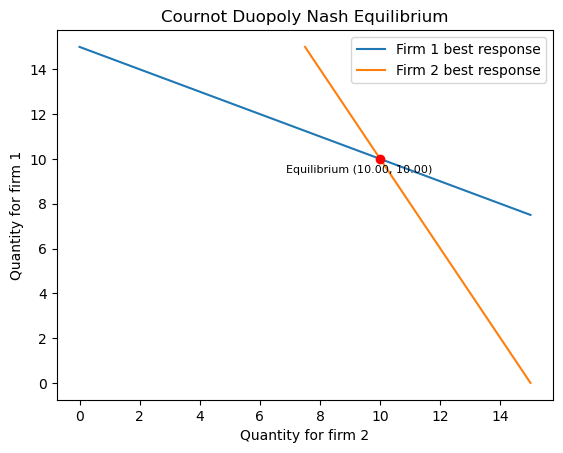

In [12]:
model = CournotDuopoly(10,10,40)

q1opt, q2opt = model.equilibrium_values()
print('Cournot Nash Equilibrium - Optimal quantity produced for both firms:\n')
print(f'Quantity for firm1: q1= {q1opt:.8f}\nQuantity for firm2: q2= {q2opt:.8f}' )

model.plot_cournot_nashequilibrium()


Now we want to see how the optimal quantity for both firms changes if the marginal cost changes. Both firms still have the same marginal cost, $ mc1 = mc2 $ but now the value is not a constant.  Our value for a (total demand when price equals zero) is the same 

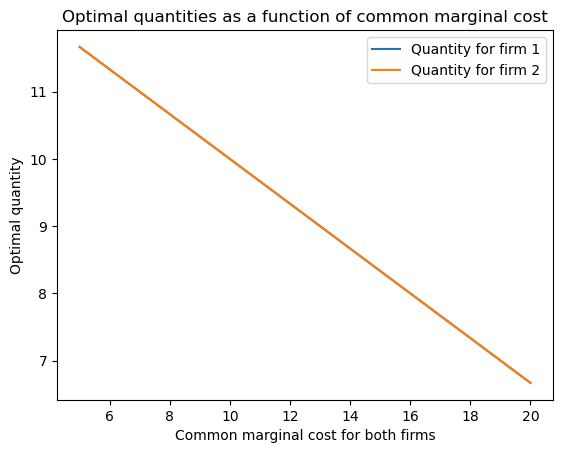

In [13]:
model.plot_mc_changes_both_firms()

We note that both firms have the same response to change in marginal cost as the firms or symmetrical, hence why there is only one line shown for both firms. It was to expect that when the margincal cost increases, the optimal quanitity decreases in response. 

Now we want to see if the firms do not have the same marginal cost and how the optimal quantity changes for each firm. We assume that the marginal cost for firm 1 changes but marginal cost for firm 2 stays constant and our value for a stays the same. 


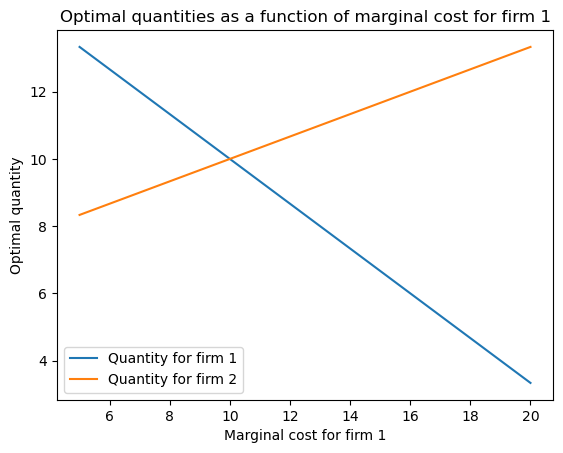

In [14]:
model.plot_cournot_mc_changes_firm1()

As before, when the marginal cost increases, the optimal quantity decreases. Here it only happens for firm 1 while the marginal cost for firm 2 stays constant. When the Marginal Cost for the firm 1 increases, the optimal quantity for firm 2 increases, as the other firm is producing less. 

## Move to Stackelberg Duopoly ## 

### Symbolical Solution for Stackelberg ### 

In Stackelberg Duopoly we have two firms that now do not choose quantity simultanously like in the Cournot Model. We assume that firm 1 ("Leader") chooses first their quantity = q1. Then firm 2 ("Follower") observes the quantity the leader chose (q1) and then sets q2. 

In [15]:
q1, q2 = symbols('q1 q2')
a, mc = symbols('a mc')
Q = q1 + q2 
P = a - Q


profitleader_Stackelberg = q1*(a - Q - mc)
profitfollower_Stackelberg = q2*(a- Q - mc)
print(profitleader_Stackelberg)
print(profitfollower_Stackelberg)

q1*(a - mc - q1 - q2)
q2*(a - mc - q1 - q2)


We solve the Stackelberg Game with a backward induction - so we start at stage two. q1 is already set, so firm 2 solves: 

$$\pi(q1,q2) = q2*(a - Q - mc) $$ 

and find the Best Response function of firm 2 by taking the first order conditions.

In [16]:
focfollower = sm.diff(profitfollower_Stackelberg,q2)
print(focfollower)

a - mc - q1 - 2*q2


And then by solving the first order conditions for q2 we get the Best Response function for firm 2: 

In [17]:
BRfollower = sm.solve(sm.Eq(focfollower,0),q2)
print(together(BRfollower))

[(a - mc - q1)/2]


Then by using backward induction we can insert this into the profit function for firm 1: 

In [18]:
profitleader_Stackelberg_subs = profitleader_Stackelberg.subs(q2, BRfollower[0])
print(together(profitleader_Stackelberg_subs))

q1*(a - mc - q1)/2


Then to find the Best response function of firm 1, we take the first order conditions of the profit function for the leader, with the Best response function of firm 2 substituted for q2: 

In [19]:
focleader = diff(profitleader_Stackelberg_subs,q1)
print(together(focleader))

(a - mc - 2*q1)/2


In [20]:
BRleader = solve(focleader,q1)
print(together(BRleader))

[(a - mc)/2]


And then the Best response function for the follower becomes: 

In [21]:
BRfollower_subs = [elem.subs(q1, BRleader[0]) for elem in BRfollower]
print(together(BRfollower_subs))

[(a - mc)/4]


### Numerical analysis for Stackelberg Duopoly ### 

Now we want to solve the Stackelberg model numerically. We note that the mc and a parameters are still the same as in the cournot model (mc=10 and a=40). 

In [22]:
# Create a StackelbergDuopoly object
stackelberg_model = StackelbergDuopoly(10, 10, 40)

# Call the method to get optimal values
optimal_values = stackelberg_model.get_optimal_values_Stackelberg()

# Print the optimal values
print(f'Optimal quantity for firm 1: {optimal_values[0]}')
print(f'Optimal quantity for firm 2: {optimal_values[1]}')


Optimal quantity for firm 1: 14.99999999254942
Optimal quantity for firm 2: 7.500000003725289


We find that in the Stackelberg model, firm 1 produces more compared to the Cournot model, while firm 2 produces less. The results are illustrated below 

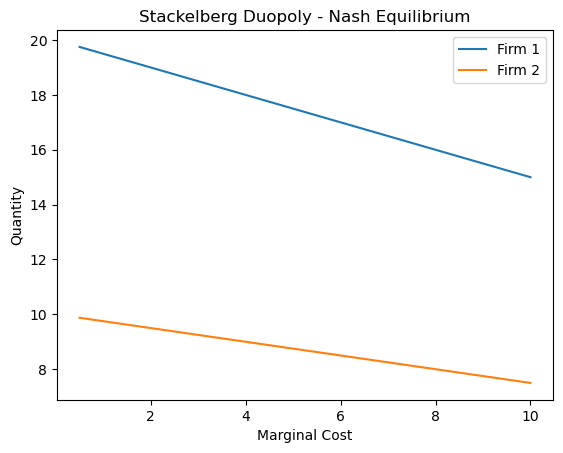

In [23]:
stackelberg_model.plot_Stackelberg()

# Comparison Cournot vs Stackelberg #

With our parameters set at 

$$ mc1 = mc2 = 10$$
$$ a = 40 $$ 

We have found the optimal quantity for both firm 1 and firm 2 in cournot, where they decide on produced quantity simultaniously and in Stackelberg where firm 1 is the leader and firm 2 is the follower. Our results are stated below in a table, given these parameters:

In [24]:
# First, create instances of your classes
cournot_model = CournotDuopoly(mc1=10, mc2=10, a=40)
stackelberg_model = StackelbergDuopoly(mc1=10, mc2=10, a=40)

# Then calculate the equilibrium quantities
q_cournot = cournot_model.equilibrium_values()
q_stackelberg = stackelberg_model.get_optimal_values_Stackelberg()

# Calculate the profits for Cournot model
profit1_cournot = cournot_model.profit1(q_cournot[0], q_cournot[1], 10)
profit2_cournot = cournot_model.profit2(q_cournot[0], q_cournot[1], 10)

# Calculate the profits for Stackelberg model
profit1_stackelberg = stackelberg_model.profit1(q_stackelberg[0], q_stackelberg[1], 10)
profit2_stackelberg = stackelberg_model.profit2(q_stackelberg[0], q_stackelberg[1], 10)

# Define the parameters, obtained quantities and profits
parameters = ['mc1', 'mc2', 'a']
quantities_cournot = ['q1_Cournot', 'q2_Cournot']
profits_cournot = ['profit1_Cournot', 'profit2_Cournot']
quantities_stackelberg = ['q1_Stackelberg', 'q2_Stackelberg']
profits_stackelberg = ['profit1_Stackelberg', 'profit2_Stackelberg']
# Calculate the total profits for both models
total_profit_cournot = profit1_cournot + profit2_cournot
total_profit_stackelberg = profit1_stackelberg + profit2_stackelberg

# Update the DataFrame to include these totals
data = {
    'Parameters': parameters + quantities_cournot + profits_cournot + ['total_profit_Cournot'] + quantities_stackelberg + profits_stackelberg + ['total_profit_Stackelberg'],
    'Values': [10, 10, 40, 10, 10, profit1_cournot, profit2_cournot, total_profit_cournot, 14.99, 7.5, profit1_stackelberg, profit2_stackelberg, total_profit_stackelberg]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
print(df)

                  Parameters  Values
0                        mc1   10.00
1                        mc2   10.00
2                          a   40.00
3                 q1_Cournot   10.00
4                 q2_Cournot   10.00
5            profit1_Cournot  100.00
6            profit2_Cournot  100.00
7       total_profit_Cournot  200.00
8             q1_Stackelberg   14.99
9             q2_Stackelberg    7.50
10       profit1_Stackelberg  112.50
11       profit2_Stackelberg   56.25
12  total_profit_Stackelberg  168.75


We see that given our parameters, firm 1 is better off in Stackelberg Duopoly, while firm 2 is worse off. 
In cournot, both firms have profit = 100 and q1=q2=10, while in the Stackelberg model firm 1 increases his quantity produced while the follower produces less. Also the profit for firm 1 in Stackelberg gets a little bit higher and amounts to 112.50, while the profit for firm 2 nearly only amounts to a little more than half compared to the Cournot model, going from 100 in the cournot to 56.25 in the Stackelberg model. 

We can also see that the total profit is lower in the Stackelberg model, given our parameters. The firms should stay in Cournot duopoly as the total profit is better off, as the gain for firm 1 amounts to little against the total loss to make the change worth it. We also conclude that the theory where the leader earns more while the follower earns less than in the Cournot Model fits our solution. 